# Introduction to Quantum Mechanics

## Blackbody Radiation

Import statements let us use outside packages. import _ as _ statements allow us to use shorthand names for packages, whereas from _ import _ let us only import certain packages. Here we use numpy, matplotlib, scipy, and scienceplots. Google and read about them to learn more.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.constants as const
import scienceplots

plt.style.use('science')

Rayleigh-Jeans Law attempts to explain blackbody radiation using 19th century physics.

$$\rho_\nu(T)=\frac{8 \pi k_B T}{c^3}\nu^2$$

Below, we'll define a python function that computes $\rho_\nu(T)$ for a given temperature and frequency:

In [2]:
def bb_19(T, nu):
    return 8 * np.pi * const.k * T * nu ** 2 / const.c ** 3

Great! Now let's plot it and take a look at what this law looks like.

nus is a numpy array with a list of frequencies that we will evaluate our function at. Note, we've set our temperature at 1000K for the sake of comparison. Look carefully at the plotting commands. First, we set up our figure and axes with the plt.subplots() command. The figure or fig, is the object that represents the entire image, whereas the axes or ax represents the part of the figure we will plot or draw on. Read matplotlib documentation for more information.

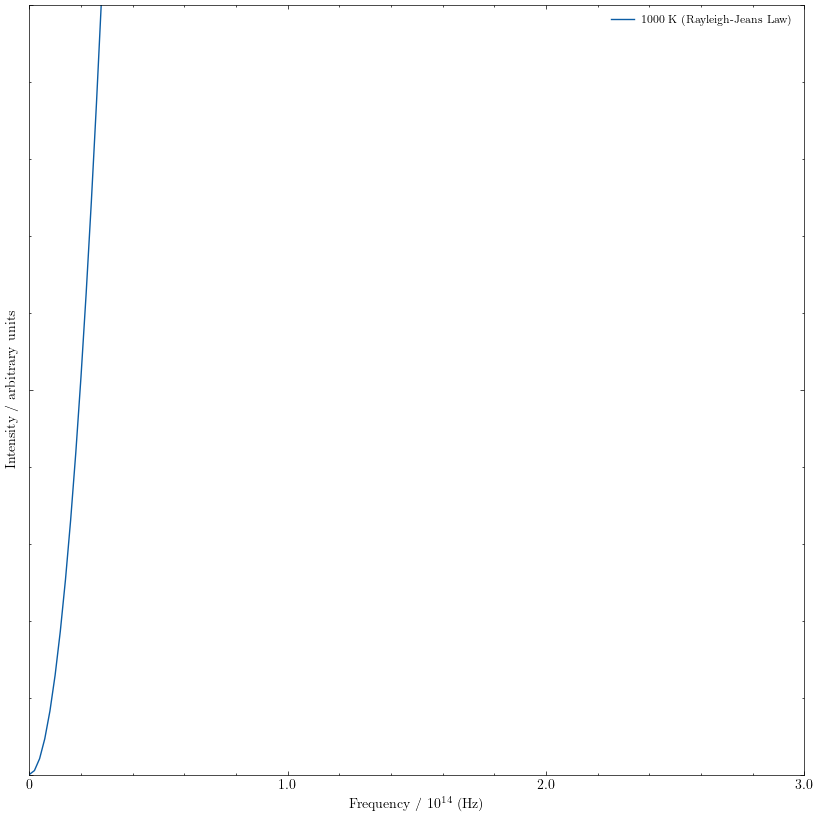

In [3]:
nus = np.linspace(1e-14, 2e15, 1000)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("Intensity / arbitrary units")
ax.set_ylim(0, 1e-17)
ax.set_xlabel(r'Frequency / $10^{14}$ (Hz)')
ax.set_xlim(0, 3e14)
ax.plot(nus, bb_19(1000, nus), label="1000 K (Rayleigh-Jeans Law)")
ax.set_xticks([0, 1e14, 2e14, 3e14], ["0", "1.0", "2.0", "3.0"])
ax.set_yticks([0, 0.5e-17, 1e-17],[])
ax.legend(loc='upper right', fontsize=8)

Oooof.. This distribution does not agree with experimental data.

Enter Max Planck, who develops his "quantum" blackbody radiation law.

$$\rho_\nu(T)=\frac{8 \pi h \nu^3}{c^3}\frac{1}{e^{\frac{h\nu}{k_BT}}-1}$$

Let's do the same as above and create a python function.

In [4]:
def planck_dist(T, nu):
    return 8 * np.pi * const.h * nu ** 3 / (const.c ** 3 * (np.exp(const.h * nu / (const.k * T)) - 1))
def planck_dist_wl(T, wavelength):
    return 8 * np.pi * const.h * const.c / (wavelength ** 5 * (np.exp(const.h * const.c / (wavelength * const.k * T)) - 1))

Now let's plot it with our classical Rayleigh-Jeans Law.

C:\Users\dairen.jean\AppData\Local\Temp\ipykernel_6040\3079861570.py:2: RuntimeWarning: divide by zero encountered in divide
  return 8 * np.pi * const.h * nu ** 3 / (const.c ** 3 * (np.exp(const.h * nu / (const.k * T)) - 1))


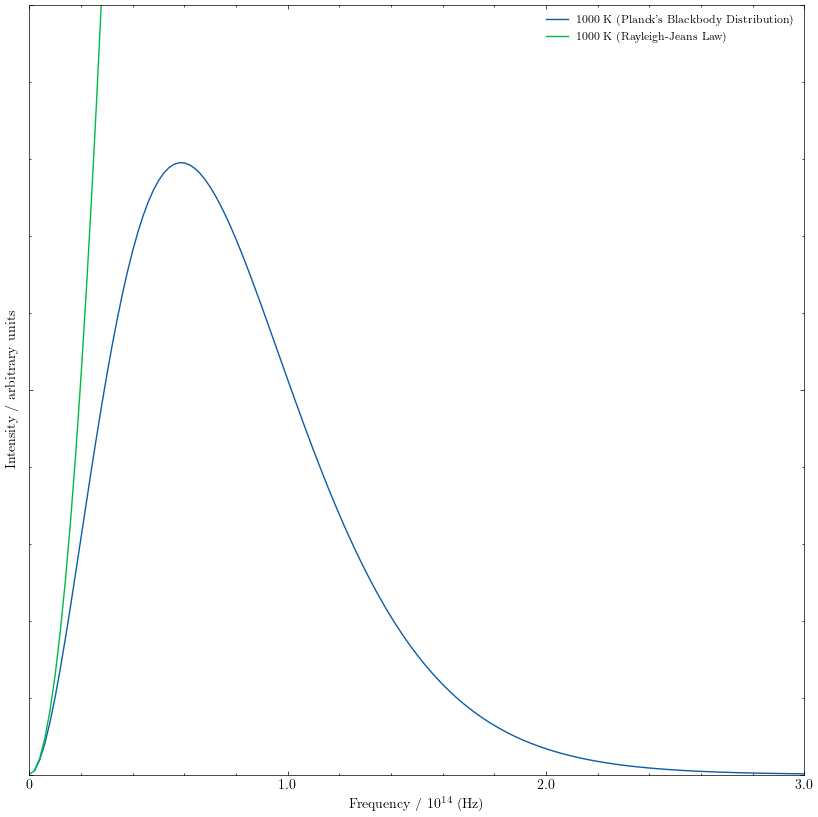

In [5]:
nus = np.linspace(1e-14, 2e15, 1000)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_ylabel("Intensity / arbitrary units")
ax.set_ylim(0, 1e-17)
ax.set_xlabel(r'Frequency / $10^{14}$ (Hz)')
ax.set_xlim(0, 3e14)
ax.plot(nus, planck_dist(1000, nus), label=f"1000 K (Planck's Blackbody Distribution)")
ax.plot(nus, bb_19(1000, nus), label="1000 K (Rayleigh-Jeans Law)")
ax.set_xticks([0, 1e14, 2e14, 3e14], ["0", "1.0", "2.0", "3.0"])
ax.set_yticks([0, 0.5e-17, 1e-17],[])
ax.legend(loc='upper right', fontsize=8)

Now, we see Planck's Law gives us a much different distribution. The divergence of these two distributions is known as the "UV Catastrophe".

Let's take a look at the EM spectrum of the Sun and compare to these two distributions.

![image.png](images/F1.3.jpg)

This shows good agreement with the distribution given from Planck's Law.

### Exercise

Now you plot the EM spectra of blackbody sources at 1,000K, 5,000K, and 10,000K.

In [6]:
# Enter your code here

## Photoelectric Effect

Following the results of Planck, Einstein used his energy quantization to develop his theory of the photoelectric effect:

$$KE = \frac{1}{2}mv^2 = h\nu - \phi$$
$$ h\nu_0 = \phi $$

where $\nu_0$ is the *threshold frequency* and $\phi$ is the *work function*.

## Bohr Model and Line Spectra

Hydrogen's atomic spectra and the Bohr Model can be used to derive the Rydberg Formula:

$$\tilde{\nu}=R_H(\frac{1}{n_1^2} - \frac{1}{n_2^2})$$

which accounts for all the lines in the hydrogen atomic spectra with the Lyman series ($n_1=1$), Balmer Series ($n_1=2$), etc..

![image.png](images/F1.7.jpg)

### Interesting Use for Hydrogen Atomic Spectra

https://en.wikipedia.org/wiki/Lyman-break_galaxy


### Exercise



Now, I want you to calculate the Balmer series energy levels (up to $n_2=5$) using a for loop. Below is code for the Lyman series

In [7]:
# Initialize an empty list to store our energies
lyman_wavenumbers = []
# Now let's loop through our n_2 values. Ranges in python are inclusive of the first value and exclusive of the second value
for i in range(2, 6):
    energy = const.Rydberg * (1 - 1 / i ** 2)
    lyman_wavenumbers.append(energy)

# Now let's print our list of energies. Reminder these are in m^-1, since the Rydberg constant is from the CODATA database and is in m^-1. Units vary. Convert carefully.
print(lyman_wavenumbers)


# Also, you could print in the loop as well

for i in range(2, 6):
    energy = const.Rydberg * (1 - 1 / i ** 2)
    print(f"{energy:.2e} m^-1")

# Now let's plot them in nm
lyman_wavelengths = []
for energy in lyman_wavenumbers:
    energy = f"{1e9 / energy:.2f} cm^{-1}"
    lyman_wavelengths.append(energy)
print(lyman_wavelengths)



[8230298.67612, 9754428.060586665, 10287873.34515, 10534782.3054336]
8.23e+06 m^-1
9.75e+06 m^-1
1.03e+07 m^-1
1.05e+07 m^-1
['121.50 cm^-1', '102.52 cm^-1', '97.20 cm^-1', '94.92 cm^-1']


Now you do it for the Balmer Series

In [8]:
 # Enter code here

## de Broglie Wavelength

Matter possesses wavelike properties as well.

He extended Einstein's relation of wavelength, $\lambda$, and momentum, $p$, to matter:

$$ \lambda=\frac{h}{p} \Longrightarrow \lambda=\frac{h}{mv} $$

### Exercise
Now, calculate the de Broglie wavelength of an electron moving at $5.9\times10^6\frac{m}{s}$ and compare it to the de Broglie wavelength of a 5.56mm round from an M4A1 barrel moving at $3.2\times10^2\frac{m}{s}$ with a mass of $1.9\times10^{-3}kg$.





In [9]:
# Code goes here

## Heisenberg Uncertainty Principle

The process of measuring small particles has consequences. There is a "resolution" balance between the momentum and position of a particle. The act of measuring a particle, say an electron, requires an interaction from a photon, which during the impact/collision imparts some momentum to the electron. The greater the energy of a photon, the greater the spatial "resolution" due to the small wavelength, but it increases the momentum imparted, and, thus increases the uncertainty in the momentum. Heisenberg's formulation is as follows:


$$\Delta x \Delta p \geq h$$

### Exercise

Calculate and compare the uncertainty in position of the elctron and 5.56mm round from the previous problem .

In [10]:
# Code goes here

References

1. McQuarrie, D.A. and Simon, J.D. (1997) Physical Chemistry: A Molecular Approach. University Science Books, Sausalito.

2. Wikipedia Contributors. Lyman-break galaxy. Wikipedia.
‌